<a href="https://colab.research.google.com/github/antonvandike/Algoritmos-Geneticos/blob/main/Libro_Eyal_Wirsansky/Handson_chapter_5_1_n_queens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solucion del problema de las N Damas || N-Queens Problem

###Configuraciones y definiciones

In [ ]:
pip install deap

In [ ]:
import queens
import elitism

In [ ]:
## Paso 1: Modulos

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random as rd
import numpy as np
import array as arr

import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
## Paso 2: Parametros del problema

# Contenido del problema
NUM_OF_QUEENS = 8 # Numero de damas
nQueens = queens.NQueensProblem(NUM_OF_QUEENS)

POPULATION_SIZE = 300      # Tamaño de los inidivios de la población
P_CROSSOVER     =  0.9    # Probabilidad de cruza
P_MUTATION      =  0.1    # Probabilidad de mutación

MAX_GENERATIONS = 100     # Maximo numero de generaciones (condición de termino)

In [ ]:
HALL_OF_FAME_SIZE = 10

In [ ]:
## Paso 3: Elementos aleatorios

RANDOM_SEED = 42          # Comunmente cuando se experimenta con un codigo
rd.seed(RANDOM_SEED)      # se corre el problema con los mismos parametros
                          # para repetir y compara resultados

In [ ]:
## Paso 4: Declarando el cromosoma

toolbox = base.Toolbox()
toolbox.register("randomOrder", rd.sample, range(len(nQueens)), len(nQueens))

In [ ]:
## Paso 5: Crear la funcion de aptitud (FITNESS)

# Se indica maximizacion y un solo peso
creator.create('FitnessMin', base.Fitness, weights = (-1.0,))

In [ ]:
## Paso 6: Crear la funcion de  aptitud del individuo

creator.create("Individual", arr.array, typecode='i', fitness=creator.FitnessMin)

In [ ]:
## Paso 7: Declarar el operador para generador de individuos

toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

In [ ]:
## Paso 8: Declarar el operador para generar la poblacion

toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [ ]:
## Paso 9: Herramienta para calcular la aptitud
##         incluida en la libreria queens
def getViolationsCount(individual):
    return nQueens.getViolationsCount(individual),

In [ ]:
## Paso 10: Declarar el operador de evaluacion

toolbox.register("evaluate", getViolationsCount)

In [ ]:
## Paso 11: Declarar los operadores geneticos

toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb=2.0/len(nQueens))
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(nQueens))

###Evolucionando la solución

In [ ]:
def nQueens_problem():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print hall of fame members info:
    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

    # plot statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(1)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    # plot best solution:
    sns.set_style("whitegrid", {'axes.grid' : False})
    nQueens.plotBoard(hof.items[0])

    # show both plots:
    plt.show()

gen	nevals	min	avg    
0  	300   	1  	5.08667
1  	259   	0  	4.34   
2  	268   	0  	4.03   
3  	260   	0  	4.04   
4  	261   	0  	3.96   
5  	261   	0  	3.85   
6  	266   	0  	3.75333
7  	274   	0  	3.67   
8  	270   	0  	3.87333
9  	258   	0  	3.89   
10 	268   	0  	3.96   
11 	266   	0  	3.72333
12 	256   	0  	3.66333
13 	269   	0  	3.51667
14 	258   	0  	3.43   
15 	260   	0  	3.55   
16 	261   	0  	3.48   
17 	253   	0  	3.53667
18 	275   	0  	3.61333
19 	267   	0  	3.76667
20 	256   	0  	3.78   
21 	254   	0  	3.71   
22 	267   	0  	3.45   
23 	268   	0  	3.60667
24 	262   	0  	3.47333
25 	270   	0  	3.5    
26 	250   	0  	3.45   
27 	256   	0  	3.32333
28 	266   	0  	3.32667
29 	271   	0  	3.56667
30 	269   	0  	3.57667
31 	274   	0  	3.57667
32 	250   	0  	3.61333
33 	262   	0  	3.67667
34 	272   	0  	3.44   
35 	262   	0  	3.68333
36 	264   	0  	3.52333
37 	258   	0  	3.56333
38 	270   	0  	3.27   
39 	266   	0  	3.28333
40 	268   	0  	3.43   
41 	249   	0  	3.53667
42 	283   	

FileNotFoundError: [Errno 2] No such file or directory: 'queen-thumbnail.png'

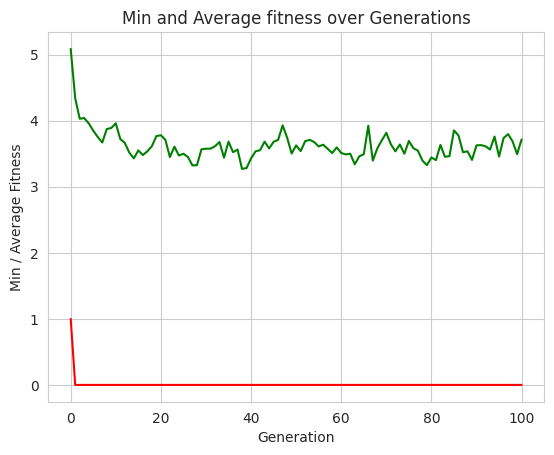

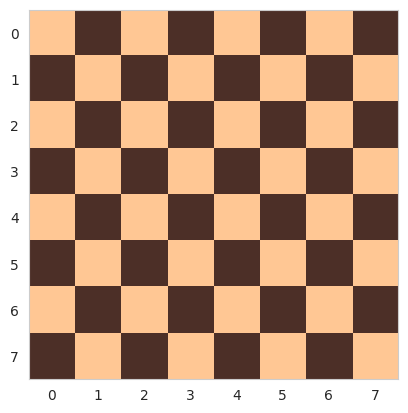

In [ ]:
nQueens_problem()